In [32]:
from pathlib import Path
import cantera as ct
import matplotlib.pyplot as plt
import pandas as pd
import math 


In [33]:

velocities = [0.1,2,3.3]


In [34]:
for i in velocities :
    p = ct.one_atm  # pressure
    tin_f = 300.0  # fuel inlet temperature
    tin_o = 300.0  # oxidizer inlet temperature
    gas = ct.Solution('Jerzembeck.yaml')
    gas.TP = gas.T, p
    fuel_velocities = math.sqrt(1.225* i*i/4.6)
    #print(fuel_velocities)
    mdot_o = 1.225 * i
    #print(mdot_o)
    mdot_f = 4.6 * fuel_velocities
    #print(mdot_f)
    comp_o = 'O2:0.21, N2:0.78, AR:0.01'
    comp_f = 'IXC8H18:1'
    width = 0.02
    loglevel = 1
    f = ct.CounterflowDiffusionFlame(gas, width=width)
    f.fuel_inlet.mdot = mdot_f
    f.fuel_inlet.X = comp_f
    f.fuel_inlet.T = tin_f 
    f.oxidizer_inlet.mdot = mdot_o
    f.oxidizer_inlet.X = comp_o
    f.oxidizer_inlet.T = tin_o
    f.boundary_emissivities = 0.0, 0.0
    # Turn radiation off
    f.radiation_enabled = False
    f.set_refine_criteria(ratio=4, slope=0.2, curve=0.1, prune=0.04)
    f.solve(loglevel, auto=True)
    f.show()
    if "native" in ct.hdf_support():
        output = Path() / "diffusion_flame.h5"
    else:
        output = Path() / "diffusion_flame.yaml"
        output.unlink(missing_ok=True)

    f.save(output)
    f.save('diffusion_flame_Vel.csv', basis="mole", overwrite=True)

    f.show_stats(0)
    Z_bilger = f.mixture_fraction('Bilger')
    YC8H18 = f.Y[gas.species_index('IXC8H18')]
    YO2 = f.Y[gas.species_index('O2')]
    mixture_fractions =[]
    mass_fractions_fuel=[]
    mass_fractions_oxidizer=[]

    # Append the data for this velocity
    mixture_fractions.append(Z_bilger)
    mass_fractions_fuel.append(YC8H18)
    mass_fractions_oxidizer.append(YO2)
    





************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.674e-07      7.215
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.711e-05      6.028
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0004384      4.674
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.002497      4.671
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.00632      4.011
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.03199      3.105
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement d

IndexError: list index out of range

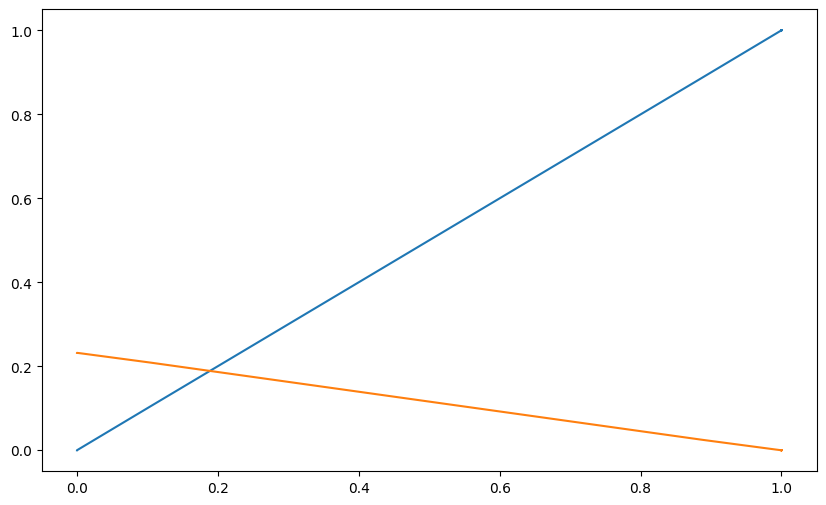

In [ ]:
plt.figure(figsize=(10, 6))

for i, velocity in enumerate(velocities):
    label = f'Velocity {velocity} m/s'
    plt.plot(mixture_fractions[i], mass_fractions_fuel[i], label=f'Fuel {label}')
    plt.plot(mixture_fractions[i], mass_fractions_oxidizer[i], label=f'Oxidizer {label}')

plt.xlabel('Mixture Fraction (Bilger)')
plt.ylabel('Mass Fraction')
plt.title('Mixture Fraction vs. Mass Fractions for Different Velocities')
plt.legend()
plt.grid(True)


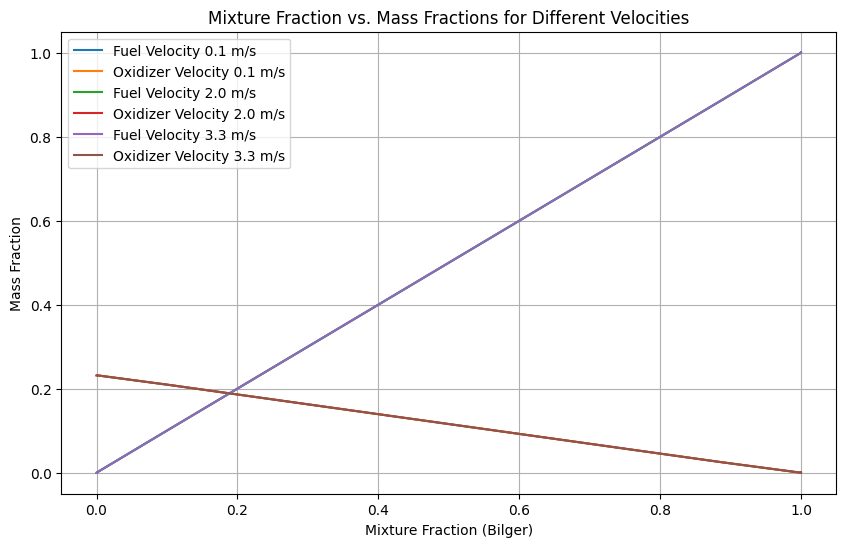

In [ ]:
import cantera as ct
import matplotlib.pyplot as plt
import numpy as np
import math

# Create a list of velocities
velocities = [0.1, 2.0, 3.3]

# Create arrays to store the data for each velocity
mixture_fractions = []
mass_fractions_fuel = []
mass_fractions_oxidizer = []

for i in velocities:
    # ... (your flame simulation code here)

    # Extract mixture fraction, mass fractions of fuel and oxidizer
    Z_bilger = f.mixture_fraction('Bilger')
    YC8H18 = f.Y[gas.species_index('IXC8H18')]
    YO2 = f.Y[gas.species_index('O2')]

    # Append the data for this velocity
    mixture_fractions.append(Z_bilger)
    mass_fractions_fuel.append(YC8H18)
    mass_fractions_oxidizer.append(YO2)

# Check if all lists have the same length
if len(mixture_fractions) != len(velocities) or len(mass_fractions_fuel) != len(velocities) or len(mass_fractions_oxidizer) != len(velocities):
    raise ValueError("Data lists do not have the same length.")

# Create a single graph to plot the data for all velocities
plt.figure(figsize=(10, 6))

for i, velocity in enumerate(velocities):
    label = f'Velocity {velocity} m/s'
    plt.plot(mixture_fractions[i], mass_fractions_fuel[i], label=f'Fuel {label}')
    plt.plot(mixture_fractions[i], mass_fractions_oxidizer[i], label=f'Oxidizer {label}')

plt.xlabel('Mixture Fraction (Bilger)')
plt.ylabel('Mass Fraction')
plt.title('Mixture Fraction vs. Mass Fractions for Different Velocities')
plt.legend()
plt.grid(True)

plt.show()


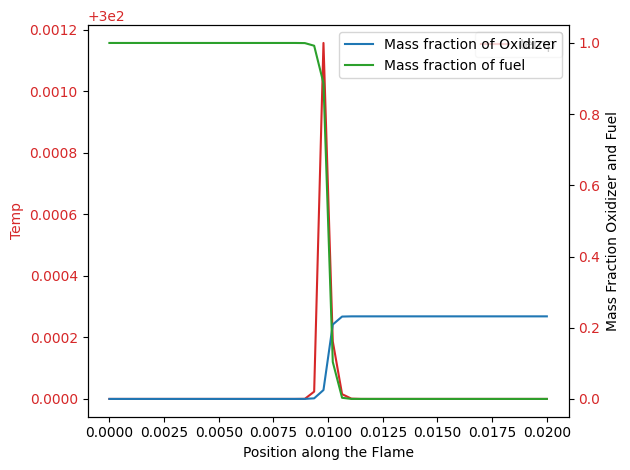

In [ ]:
fuel_index = gas.species_index('IXC8H18')
oxidizer_index = gas.species_index('O2') 
mass_fuel = f.Y[fuel_index]
mass_oxidizer = f.Y[oxidizer_index]

with open('mass_fractions.csv', 'w') as file:
    file.write('Position, Mass Fraction Fuel, Mass Fraction Oxidizer\n')
    for i, (x, y_fuel, y_oxidizer) in enumerate(zip(f.flame.grid, mass_fuel, mass_oxidizer)):
        file.write(f'{x:.6f}, {y_fuel:.6f}, {y_oxidizer:.6f}\n')
    color = 'tab:red'
    fig, ax1 = plt.subplots()
    ax1.plot(f.flame.grid, f.T, color=color, label='temp')
    ax1.set_xlabel('Position along the Flame')
    ax1.set_ylabel('Temp', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color1 = 'tab:blue'
    color2 = 'tab:green'
    ax2.plot(f.flame.grid, mass_oxidizer, color=color1,label= "Mass fraction of Oxidizer")
    ax2.plot(f.flame.grid,mass_fuel,color=color2,label= 'Mass fraction of fuel')
    ax2.legend()
    ax1.legend()
    ax2.set_ylabel('Mass Fraction Oxidizer and Fuel')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.show()